#**Part 3: Metrics**

In scikit-learn, **metrics** are functions used to **evaluate the performance** of machine learning models.

They differ based on the **type of task**: classification, regression, or clustering.






##1. Classification Metrics

| Metric             | Purpose                                      |
| ------------------ | -------------------------------------------- |
| `accuracy_score`   | % of correct predictions                     |
| `precision_score`  | How many predicted positives are correct     |
| `recall_score`     | How many actual positives were caught        |
| `f1_score`         | Harmonic mean of precision and recall        |
| `confusion_matrix` | Matrix showing TP, FP, FN, TN                |
| `roc_auc_score`    | Measures performance at different thresholds |


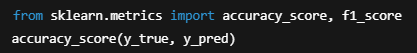

##2. Regression Metrics

| Metric                      | Purpose                                    |
| --------------------------- | ------------------------------------------ |
| `mean_squared_error` (MSE)  | Average squared error                      |
| `mean_absolute_error` (MAE) | Average absolute error                     |
| `r2_score`                  | Proportion of variance explained (max = 1) |

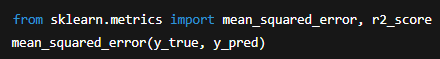

##3. Clustering Metrics

| Metric                | Purpose                            |
| --------------------- | ---------------------------------- |
| `adjusted_rand_score` | Similarity between two clusterings |
| `silhouette_score`    | How well samples are clustered     |


## Using a credit card fraud detection dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [ ]:
df  = pd.read_csv("creditcard.csv")[:80_000]
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [ ]:
X = df.drop(columns=['Time', 'Amount', 'Class']).values
y = df['Class'].values
print(f"Shapes of X={X.shape} y={y.shape}, #Fraud Cases={y.sum()}")

Shapes of X=(80000, 28) y=(80000,), #Fraud Cases=196


In [ ]:
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=1000)
mod.fit(X, y).predict(X).sum()

np.int64(172)

In [ ]:
from sklearn.metrics import recall_score, precision_score, make_scorer

#recall_score = did i get all the fraud cases?
#precision_score = given that i predict fraud how accurate am I?

In [ ]:
def min_recall_precision(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

make_scorer(min_recall_precision, greater_is_better=False)
# ?make_scorer

make_scorer(min_recall_precision, greater_is_better=False, response_method='predict')

In [ ]:
from sklearn.model_selection import GridSearchCV

def min_recall_precision(est, X, y_true, sample_weight=None):
    y_pred = est.predict(X)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]},
    scoring={'precision': make_scorer(precision_score),
             'recall': make_scorer(recall_score),
             'min_both': min_recall_precision},
    refit='min_both',
    return_train_score=True,
    cv=10,
    n_jobs=-1
)
grid.fit(X, y);

In [ ]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split2_train_min_both,split3_train_min_both,split4_train_min_both,split5_train_min_both,split6_train_min_both,split7_train_min_both,split8_train_min_both,split9_train_min_both,mean_train_min_both,std_train_min_both
0,0.169406,0.022240,0.011661,0.000966,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",1.000000,0.463415,0.583333,1.000000,...,0.632768,0.559322,0.573864,0.573864,0.562500,0.619318,0.625000,0.602273,0.611049,0.051750
1,0.191162,0.056662,0.016427,0.010700,"{0: 1, 1: 1.6551724137931034}","{'class_weight': {0: 1, 1: 1.6551724137931034}}",1.000000,0.441860,0.583333,1.000000,...,0.689266,0.627119,0.670455,0.647727,0.630682,0.681818,0.698864,0.687500,0.681366,0.053324
2,0.203285,0.068179,0.013317,0.008022,"{0: 1, 1: 2.310344827586207}","{'class_weight': {0: 1, 1: 2.310344827586207}}",1.000000,0.431818,0.583333,1.000000,...,0.734463,0.683616,0.715909,0.693182,0.681818,0.721591,0.744318,0.727273,0.723889,0.044372
3,0.165911,0.021353,0.011722,0.002267,"{0: 1, 1: 2.9655172413793105}","{'class_weight': {0: 1, 1: 2.9655172413793105}}",1.000000,0.431818,0.583333,1.000000,...,0.779661,0.706215,0.744318,0.732955,0.715909,0.755682,0.772727,0.738636,0.749413,0.039118
4,0.262656,0.044866,0.015853,0.005584,"{0: 1, 1: 3.6206896551724137}","{'class_weight': {0: 1, 1: 3.6206896551724137}}",1.000000,0.431818,0.583333,1.000000,...,0.819209,0.734463,0.761364,0.744318,0.732955,0.778409,0.784091,0.761364,0.770939,0.035655
5,0.170348,0.020045,0.011053,0.000601,"{0: 1, 1: 4.275862068965517}","{'class_weight': {0: 1, 1: 4.275862068965517}}",1.000000,0.431818,0.583333,1.000000,...,0.841808,0.774011,0.778409,0.789773,0.784091,0.789773,0.801136,0.772727,0.794190,0.029023
6,0.169383,0.007607,0.010959,0.000292,"{0: 1, 1: 4.931034482758621}","{'class_weight': {0: 1, 1: 4.931034482758621}}",1.000000,0.431818,0.583333,1.000000,...,0.847458,0.790960,0.795455,0.808989,0.795455,0.801136,0.805556,0.795455,0.810148,0.022218
7,0.170569,0.018008,0.010598,0.000341,"{0: 1, 1: 5.586206896551724}","{'class_weight': {0: 1, 1: 5.586206896551724}}",1.000000,0.431818,0.583333,1.000000,...,0.842697,0.805556,0.802198,0.806630,0.798883,0.812500,0.806630,0.804469,0.814279,0.018862
8,0.168590,0.008459,0.010848,0.000628,"{0: 1, 1: 6.241379310344827}","{'class_weight': {0: 1, 1: 6.241379310344827}}",1.000000,0.422222,0.583333,0.947368,...,0.842697,0.807692,0.805405,0.812155,0.800000,0.806630,0.807487,0.807692,0.816528,0.019387
9,0.174148,0.021431,0.010948,0.000274,"{0: 1, 1: 6.896551724137931}","{'class_weight': {0: 1, 1: 6.896551724137931}}",0.944444,0.422222,0.583333,0.947368,...,0.837989,0.808743,0.805405,0.813187,0.802198,0.812155,0.808511,0.809783,0.817216,0.018230



Here's a summary for the test metrics.

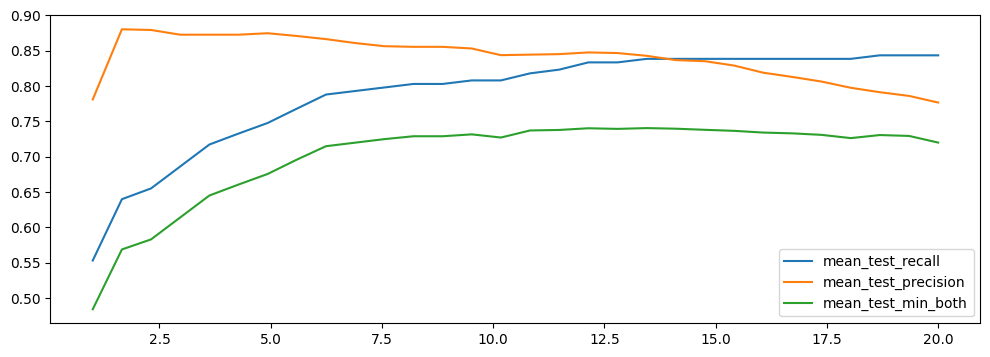

In [ ]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision', 'mean_test_min_both']:
    plt.plot([_[1] for _ in df_results['param_class_weight']],
             df_results[score],
             label=score)
plt.legend();

And here's the train metrics.

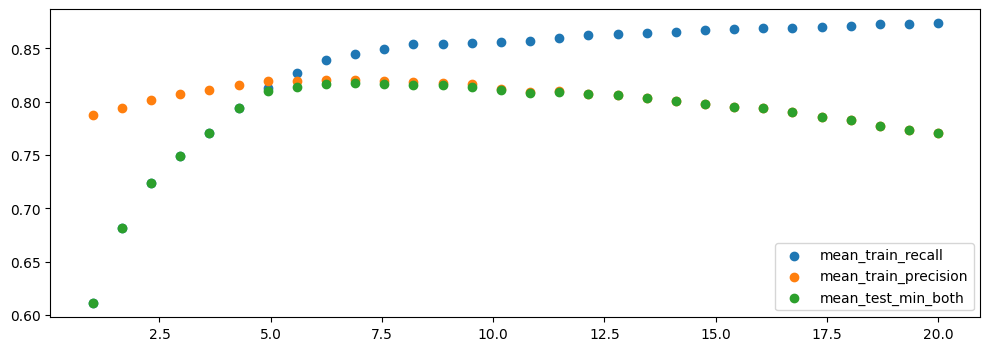

In [ ]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_train_recall', 'mean_train_precision', 'mean_test_min_both']:
    plt.scatter(x=[i[1] for i in df_results['param_class_weight']],
                y=df_results[score.replace('test', 'train')],
                label=score)
plt.legend(loc = 'lower right');

##**Using Outlier Detection Models**

###**IsolationForest with Precision/Recall Grid Search**

Used Isolation Forest for Outlier Detection.

In [ ]:
from sklearn.ensemble import IsolationForest
mod = IsolationForest().fit(X)
np.where(mod.predict(X) == -1, 1, 0)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score

Define custom scorers

In [ ]:
def outlier_precision(mod, X, y):
    preds = mod.predict(X)
    return precision_score(y, np.where(preds == -1, 1, 0))

def outlier_recall(mod, X, y):
    preds = mod.predict(X)
    return recall_score(y, np.where(preds == -1, 1, 0))

Performed GridSearchCV on IsolationForest with custom scorers.

In [ ]:
param_range = np.linspace(0.001, 0.02, 10)

grid = GridSearchCV(
    estimator=IsolationForest(random_state=42),
    param_grid={'contamination': param_range},
    scoring={'precision': outlier_precision, 'recall': outlier_recall},
    refit='precision',
    cv=5,
    n_jobs=-1
)

grid.fit(X, y)  # X: features, y: actual fraud labels (0 or 1)

GridSearchCV(cv=5, estimator=IsolationForest(random_state=42), n_jobs=-1,
             param_grid={'contamination': array([0.001     , 0.00311111, 0.00522222, 0.00733333, 0.00944444,
       0.01155556, 0.01366667, 0.01577778, 0.01788889, 0.02      ])},
             refit='precision',
             scoring={'precision': <function outlier_precision at 0x7bb01a54cb80>,
                      'recall': <function outlier_recall at 0x7bb01a54d260>})

Access result

In [ ]:
df_results = pd.DataFrame(grid.cv_results_)

In [ ]:
#To avoid KeyError,we will print the actual column names:
print(df_results.columns.tolist())

['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_contamination', 'params', 'split0_test_precision', 'split1_test_precision', 'split2_test_precision', 'split3_test_precision', 'split4_test_precision', 'mean_test_precision', 'std_test_precision', 'rank_test_precision', 'split0_test_recall', 'split1_test_recall', 'split2_test_recall', 'split3_test_recall', 'split4_test_recall', 'mean_test_recall', 'std_test_recall', 'rank_test_recall']


In [ ]:
#Ensure 'param_contamination' is present.
print(df_results.filter(like='param').head())

   param_contamination                                   params
0             0.001000                 {'contamination': 0.001}
1             0.003111  {'contamination': 0.003111111111111111}
2             0.005222  {'contamination': 0.005222222222222222}
3             0.007333  {'contamination': 0.007333333333333333}
4             0.009444  {'contamination': 0.009444444444444443}


 Plot Precision & Recall vs Contamination

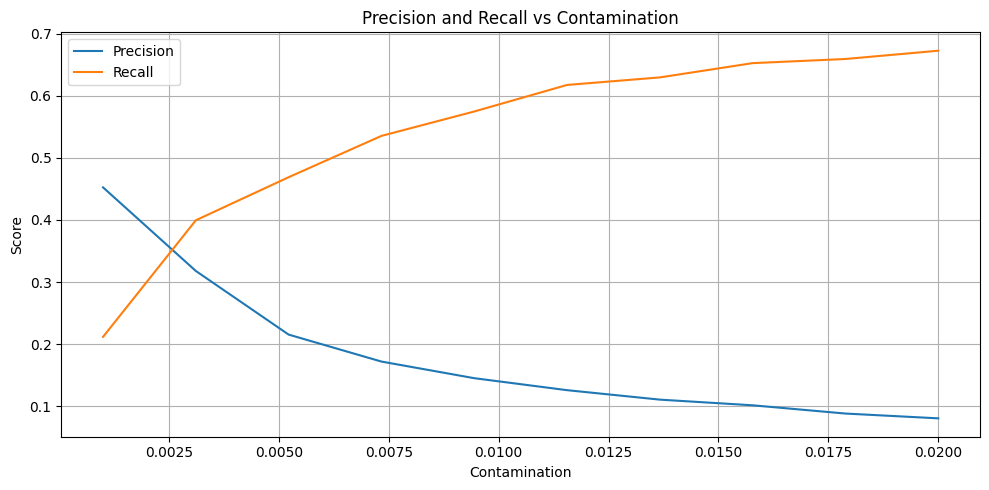

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df_results['param_contamination'], df_results['mean_test_precision'], label='Precision')
plt.plot(df_results['param_contamination'], df_results['mean_test_recall'], label='Recall')
plt.xlabel('Contamination')
plt.ylabel('Score')
plt.title('Precision and Recall vs Contamination')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

###**Logistic Regression with Precision/Recall Grid Search**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

Define custom scorers and parameter grid

In [ ]:
# Custom scoring function: minimum of precision and recall
def min_pre_rec(y_true, y_pred):
    return min(recall_score(y_true, y_pred), precision_score(y_true, y_pred))

# Define parameter grid
param_grid = {
    'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 40, 10)]  # 10 values between 1 and 40
}

# Initialize Logistic Regression model (without fixed class_weight)
logreg = LogisticRegression(max_iter=1000, solver='liblinear')

GridSearchCV

In [ ]:
grid = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring={
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'min_pre_rec': make_scorer(min_pre_rec)
    },
    refit='precision',
    cv=10,
    n_jobs=-1
)

# Fit the model
grid.fit(X, y)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: np.float64(1.0)},
                                          {0: 1,
                                           1: np.float64(5.333333333333333)},
                                          {0: 1,
                                           1: np.float64(9.666666666666666)},
                                          {0: 1, 1: np.float64(14.0)},
                                          {0: 1,
                                           1: np.float64(18.333333333333332)},
                                          {0: 1,
                                           1: np.float64(22.666666666666664)},
                                          {0: 1, 1: np.float64(27.0)},
                                          {0: 1,
                                           1: np.float64(31.333333333333332)},
                                          {0: 1,
                                           1: np.float64(35.666666666666664)},
                                          {0: 1, 1: np.float64(40.0)}]},
             refit='precision',
             scoring={'min_pre_rec': make_scorer(min_pre_rec, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

In [ ]:
# Results to DataFrame
df = pd.DataFrame(grid.cv_results_)

# Extract weights (1 -> fraud class)
weights = [cw[1] for cw in df['param_class_weight']]

Plot

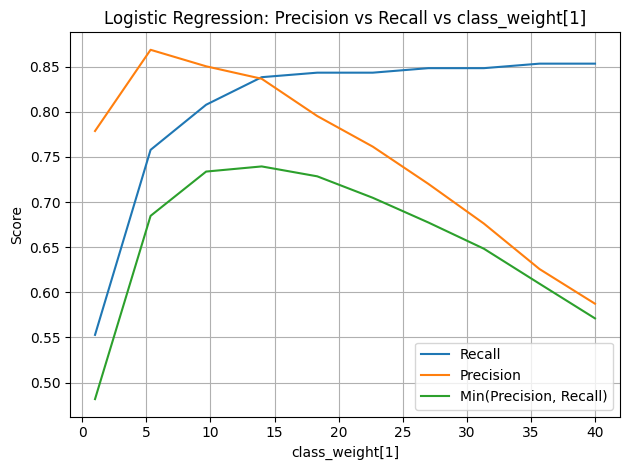

In [ ]:
plt.plot(weights, df['mean_test_recall'], label='Recall')
plt.plot(weights, df['mean_test_precision'], label='Precision')
plt.plot(weights, df['mean_test_min_pre_rec'], label='Min(Precision, Recall)')
plt.xlabel('class_weight[1]')
plt.ylabel('Score')
plt.title('Logistic Regression: Precision vs Recall vs class_weight[1]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Important Notes**

* Make sure X and y are preprocessed correctly (y should be binary: 0 for normal, 1 for fraud).

* You don’t need `outlier_precision()` or `outlier_recall()` here — those are used for unsupervised models like `IsolationForest`.

* You should not use fixed `class_weight=10` in the estimator when you’re tuning it through the param grid.